In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h2>Seudo color</h2>
<p>A partir de una imagen monobanda se realizará un seudo color basado en el ND. Se aplicará un color de nuestra elección a todos los píxeles con ND en un rango determinado. Se ajustarán los valores del rango a uno que permita discriminar lo mejor posible alguna característica de la imagen de nuestra elección (nubes, tierra, mar, luces, etc).
    
Hay que tener en cuenta que una imagen en escala de grises se puede representar en el dominio RGB asignándole a cada canal el valor en escala de grises.</p>

In [2]:
def seudo(img, min_, max_):
    img=cv2.imread(img,cv2.IMREAD_GRAYSCALE)
    resimg=np.zeros((img.shape[0],img.shape[1],3), np.uint8)
    img2=cv2.inRange(img, min_, max_)           #los píxeles que se encuentren dentro del rango dado se ponen a 255 y el resto a cero
    imgand=cv2.bitwise_and(img,img, mask=img2)  #AND píxel a píxel usando como máscara img2 (solo con los píxeles dentro del rango)
    for x in range(resimg.shape[0]):
        for y in range(resimg.shape[1]):
            if imgand[x,y]!=0:                  #si el valor digital es distinto de 0, entonces considero que está dentro del rango, por lo que le asigno el color rojo 
                resimg[x,y]=[255,0,0]
            else:                               #si es igual a 0, entonces no está dentro del rango y por eso le asigno el valor digital de la imagen original
                resimg[x,y]=img[x,y]
    return resimg

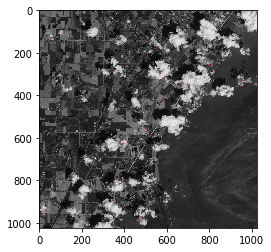

In [3]:
original=cv2.imread('../imgpack/Monobanda/7_Lake Erie.jpg',cv2.IMREAD_GRAYSCALE)
path_img='../imgpack/Monobanda/7_Lake Erie.jpg'
img_seudo_128=seudo(path_img, 128, 128)

plt.imshow(img_seudo_128)
plt.show()

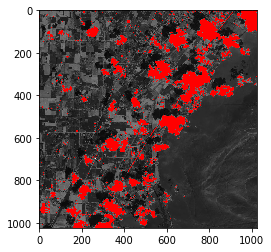

In [4]:
img_seudo=seudo(path_img, 125, 240)  #nubes

plt.imshow(img_seudo)
plt.show()

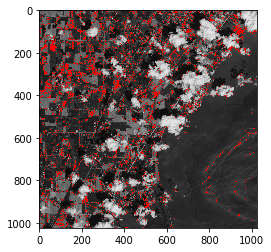

In [5]:
img_seudo2=seudo(path_img, 70, 85) #cultivos

plt.imshow(img_seudo2)
plt.show()

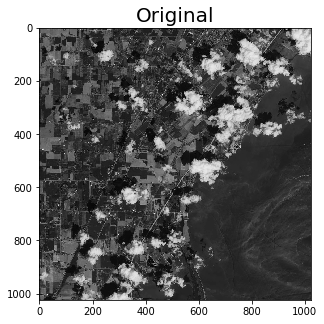

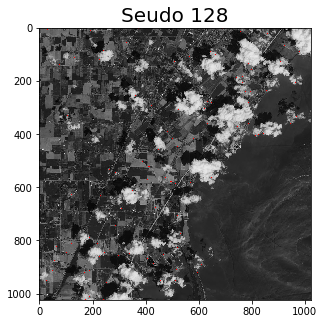

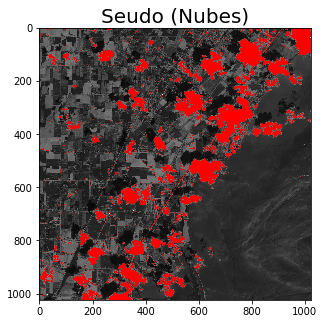

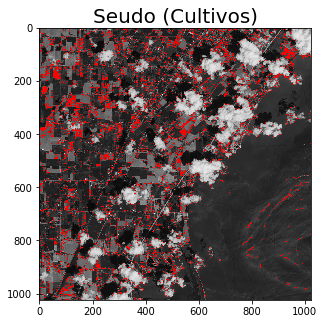

In [6]:
plt.figure(1, figsize=(5, 5))
plt.imshow(original, cmap = 'gray')
plt.title("Original", fontsize = 20)

plt.figure(2, figsize=(5, 5))
plt.imshow(img_seudo_128)
plt.title("Seudo 128", fontsize = 20)

plt.figure(3, figsize=(5, 5))
plt.imshow(img_seudo)
plt.title("Seudo (Nubes)", fontsize = 20)

plt.figure(4, figsize=(5, 5))
plt.imshow(img_seudo2)
plt.title("Seudo (Cultivos)", fontsize = 20)

plt.show()

In [7]:
cv2.imwrite("modificadas/Ej2_Seudo_128.png", cv2.cvtColor(img_seudo_128, cv2.COLOR_BGR2RGB))
cv2.imwrite("modificadas/Ej2_Seudo_Nubes.png", cv2.cvtColor(img_seudo, cv2.COLOR_BGR2RGB))
cv2.imwrite("modificadas/Ej2_Seudo_Cultivos.png", cv2.cvtColor(img_seudo2, cv2.COLOR_BGR2RGB))

True